Problem Statement:
You work in XYZ Company as a Python Data Scientist. The company officials have collected some data 
on salaries based on year of experience and wish for you to create a model from it. 
Dataset: diabetes.csv 
Tasks to be performed: 
1. Load the dataset using pandas 
2. Extract data fromOutcome column is a variable named Y 
3. Extract data from every column except Outcome column in a variable named X.
4. Divide the dataset into two parts for training and testing in 70% and 30% proportion 
5. Create and train Random Forest Model on training set 
6. Make predictions based on the testing set using the trained model 
7. Check the performance by calculating the confusion matrix and accuracy score of the model 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import roc_curve

In [2]:
df=pd.read_csv('diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
Y=df.Outcome
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [4]:
X=df.iloc[:,:8]
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [5]:
X_train, X_test,y_train, y_test = train_test_split(X,Y ,
                                   random_state=104, 
                                   test_size=0.30, 
                                   shuffle=True)

In [6]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print(prediction_test)
print(metrics.accuracy_score(y_test, prediction_test))

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0
 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1
 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0
 0 0 0 1 1 0 0 0 0]
0.7489177489177489


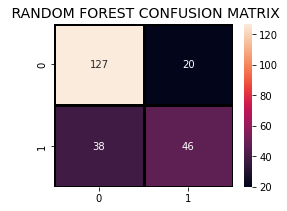

In [7]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

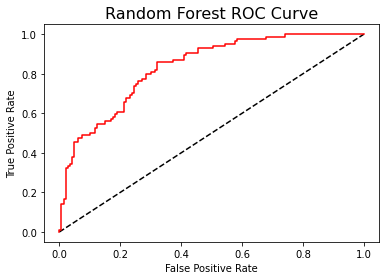

In [8]:
y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();